# Analysing historical records of wave data from IMOS

Access to historical records is important to 
* evaluate global and local impacts of climate change & anthropogenic influences and 
* test and validate models. In the modelling area, this kind of approach is done  routinely to evaluate models performances (hindcast models).

Here we will see how we can query historical data from a buoy located offshore Sydney. 

Our dataset is available from: 

<a href='http://imos.org.au'>IMOS Data Portal</a> and has been recorded by the <a href='http://new.mhl.nsw.gov.au/TodaysConditions-Sydney'>**Manly Hydraulics Laboratory**</a>:
+ <a href='http://imos-data.s3-website-ap-southeast-2.amazonaws.com/?prefix=NSW-OEH/Manly_Hydraulics_Laboratory/Wave/Sydney/'>dataset link</a>

We will use the **netCDF** libary (<a ref='http://www.unidata.ucar.edu/netcdf/'>Network Common Data Form</a>) is a set of software libraries and self-describing, machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. The project homepage is hosted by the **Unidata** program at the University Corporation for Atmospheric Research (**UCAR**).

Loading a module is straight forward:

In [1]:
%matplotlib inline
from pylab import *
import netCDF4
import datetime as dt
import numpy as np
import pandas as pd

from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import netCDF4 
url = 'http://....nc'
mydata = netCDF4.Dataset(url)

# mydata.variables.keys()
mydata['HRMS'] 
mydata['HRMS'][:]

In [ ]:
'TIME','HRMS',....

In [ ]:
mydata['HRMS'] #(unit,name,validity range, Nan=-9999.9)

In [ ]:
mydata['HRMS'][:]

# 2015 Waverider Buoy dataset

We will use a dataset containing ocean wave data from wave monitoring buoy moored off Sydney at latitude 33$^o$46'26" S, longitude 151$^o$24'42" E and water depth 90 metres.  

<a href='https://s3-ap-southeast-2.amazonaws.com/imos-data/NSW-OEH/Manly_Hydraulics_Laboratory/Wave/Sydney/Sydney_Waverider_Buoy_location_history.pdf'> Sydney Waverider Buoy location history</a>



The data is gathered using the Directional Waverider system developed by the Dutch company, Datawell. The Directional Waverider buoy utilises a heave-pitch-roll sensor, two fixed X and Y accelerometers and a three axis fluxgate compass to measure both vertical and horizontal motion.  An on-board processor converts the buoy motion to three orthogonal (vertical, north-south, east-west) translation signals that are transmitted to the shore station.  The directional spectrum is also routinely transmitted to the receiving station for further processing.  The wave data is stored on the receiving station PC before routine transfer to Manly Hydraulics Laboratory.

In [2]:
# Offshore Sydney buoy data
filename = '../../dataset/IMOS_ANMN-NSW_W_20150210T230000Z_WAVESYD_WAVERIDER_FV01_END-20171231T130000Z.nc'
# Offshore Batemans Bay buoy data
#filename = '../../dataset/IMOS_ANMN-NSW_W_20080124T210000Z_WAVEBAB_WAVERIDER_FV01_END-20151231T130000Z.nc'
nc_data=netCDF4.Dataset(filename)

In [3]:
nc_data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    publisher_email: benedicte.pasquer@utas.edu.au
    citation: The citation to be used in publications using the dataset should follow the format: "IMOS. [year-of-data- download], [Title], [Data access URL], accessed [date- of-access]."
    license: http://creativecommons.org/licenses/by/4.0/
    cdm_data_type: Station
    creator_email: MHL.Reception@mhl.nsw.gov.au
    publisher_name: Pasquer, Benedicte
    standard_name_vocabulary: NetCDF Climate and Forecast (CF) Metadata Convention Standard Name Table 65
    author: Pasquer, Benedicte
    data_centre_email: info@aodn.org.au
    Conventions: CF-1.6,IMOS-1.4
    project: Integrated Marine Observing System (IMOS)
    principal_investigator: Kulmar, Mark
    publisher_institution: Australian Ocean Data Network (AODN)
    geospatial_lon_units: degrees_east
    disclaimer: Data, products and services from IMOS are provided "as is" without any warranty

## Query dataset

Let have a look at the loaded netCDF variables

In [4]:
nc_data.variables.keys()

dict_keys(['TIME', 'TIMESERIES', 'LATITUDE', 'LONGITUDE', 'WHTH', 'WMSH', 'HRMS', 'WHTE', 'WMXH', 'TCREST', 'WPMH', 'WPTH', 'YRMS', 'WPPE', 'TP2', 'M0', 'WPDI'])

In [25]:
nc_data.variables['HRMS']

<class 'netCDF4._netCDF4.Variable'>
float32 HRMS(TIME)
    _FillValue: 99999.0
    units: m
    long_name: sea_surface_wave_root_mean_square_height
    coordinates: TIME LATITUDE LONGITUDE
    comment: Analysed by zero crossing method
unlimited dimensions: 
current shape = (23382,)
filling on

## Find out time interval record

Get the time extension of the gathered data...

In [14]:
units = nc_data.variables['TIME'].units
calendar = nc_data.variables['TIME'].calendar

times = netCDF4.num2date(nc_data.variables['TIME'][:], units=units, calendar=calendar)

In [16]:
times

masked_array(data=[cftime.DatetimeGregorian(2015, 2, 10, 23, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2015, 2, 11, 0, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2015, 2, 11, 1, 0, 0, 0, has_year_zero=False),
                   ...,
                   cftime.DatetimeGregorian(2017, 12, 31, 11, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2017, 12, 31, 12, 0, 0, 0, has_year_zero=False),
                   cftime.DatetimeGregorian(2017, 12, 31, 13, 0, 0, 0, has_year_zero=False)],
             mask=False,
       fill_value='?',
            dtype=object)

In [17]:
start = dt.datetime(1985,1,1)
# Get desired time step  
time_var = nc_data.variables['TIME']
itime = netCDF4.date2index(start,time_var,select='nearest')
dtime = netCDF4.num2date(time_var[itime],time_var.units)
daystr = dtime.strftime('%Y-%b-%d %H:%M')

print('buoy record start time:',daystr)

buoy record start time: 2015-Feb-10 23:00


In [18]:
end = dt.datetime(2018,1,1)
# Get desired time step  
time_var = nc_data.variables['TIME']
itime2 = netCDF4.date2index(end,time_var,select='nearest')
dtime2 = netCDF4.num2date(time_var[itime2],time_var.units)
dayend = dtime2.strftime('%Y-%b-%d %H:%M')

print('buoy record end time:',dayend)

buoy record end time: 2017-Dec-31 13:00


In [20]:
print('Records per day:')
for k in range(1,24):
    print(k,netCDF4.num2date(time_var[k],time_var.units))

Records per day:
1 2015-02-11 00:00:00
2 2015-02-11 01:00:00
3 2015-02-11 02:00:00
4 2015-02-11 03:00:00
5 2015-02-11 04:00:00
6 2015-02-11 05:00:00
7 2015-02-11 06:00:00
8 2015-02-11 07:00:00
9 2015-02-11 08:00:00
10 2015-02-11 09:00:00
11 2015-02-11 10:00:00
12 2015-02-11 11:00:00
13 2015-02-11 12:00:00
14 2015-02-11 13:00:00
15 2015-02-11 14:00:00
16 2015-02-11 15:00:00
17 2015-02-11 16:00:00
18 2015-02-11 17:00:00
19 2015-02-11 18:00:00
20 2015-02-11 19:00:00
21 2015-02-11 20:00:00
22 2015-02-11 21:00:00
23 2015-02-11 22:00:00


## Buoy location

Check the location of the data

In [21]:
loni = nc_data.variables['LONGITUDE'][:]
lati = nc_data.variables['LATITUDE'][:]
print(loni,lati)
names=[]
names.append('Offshore Sydney Buoy')

151.41167 -33.77389


## Visualise buoy records

Export for the historical time serie, the desired buoy variables, here we use HRMS:

In [22]:
times = nc_data.variables['TIME']
datatime = netCDF4.num2date(times[:],times.units, only_use_cftime_datetimes=False, 
                           only_use_python_datetimes=True).flatten()
height = nc_data.variables['HRMS'][:].flatten()
period = nc_data.variables['TCREST'][:].flatten()

In [23]:
nc_data.variables['HRMS'].name,nc_data.variables['HRMS'].units

('HRMS', 'm')

Now plot the exported dataset

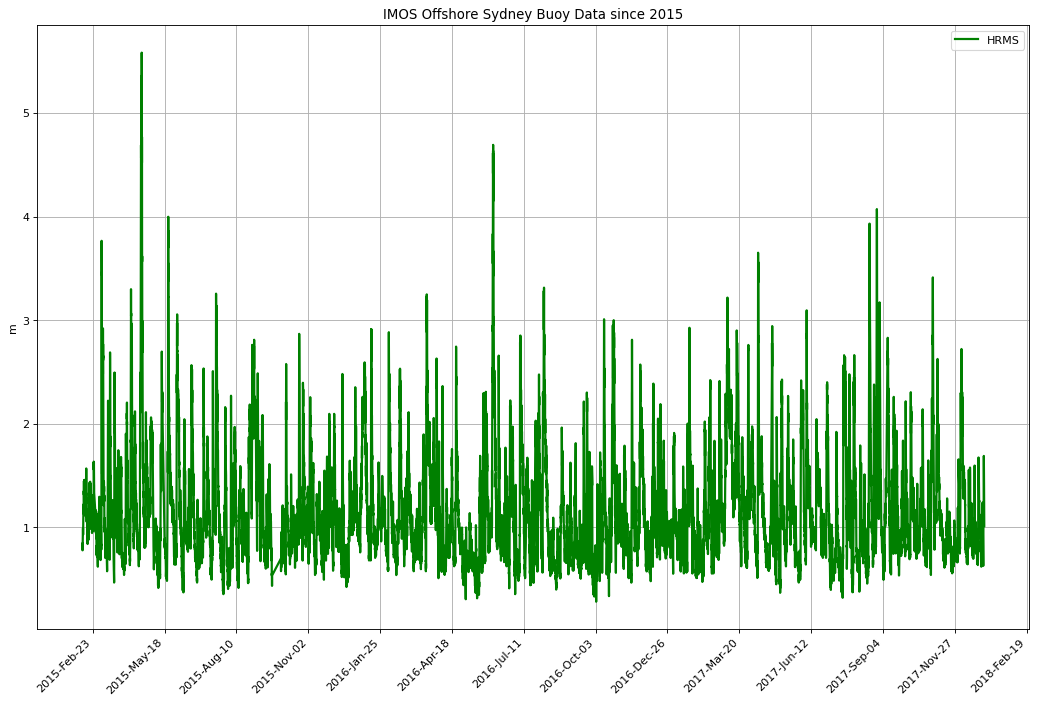

In [24]:
MyDateFormatter = DateFormatter('%Y-%b-%d')
fig = plt.figure(figsize=(16,10), dpi=80) 
ax1 = fig.add_subplot(111)

ax1.plot(datatime[itime:itime2],height[itime:itime2],linewidth=2,color='green') 
ax1.xaxis.set_major_locator(WeekdayLocator(byweekday=MO,interval=12))
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('IMOS Offshore Sydney Buoy Data since 2015')
ax1.set_ylabel(nc_data.variables['HRMS'].units)
names = [nc_data.variables['HRMS'].name]
ax1.legend(names,loc='upper right')

In [28]:
height.mean(),period.mean()

(1.1498777, 4.1663547423210385)

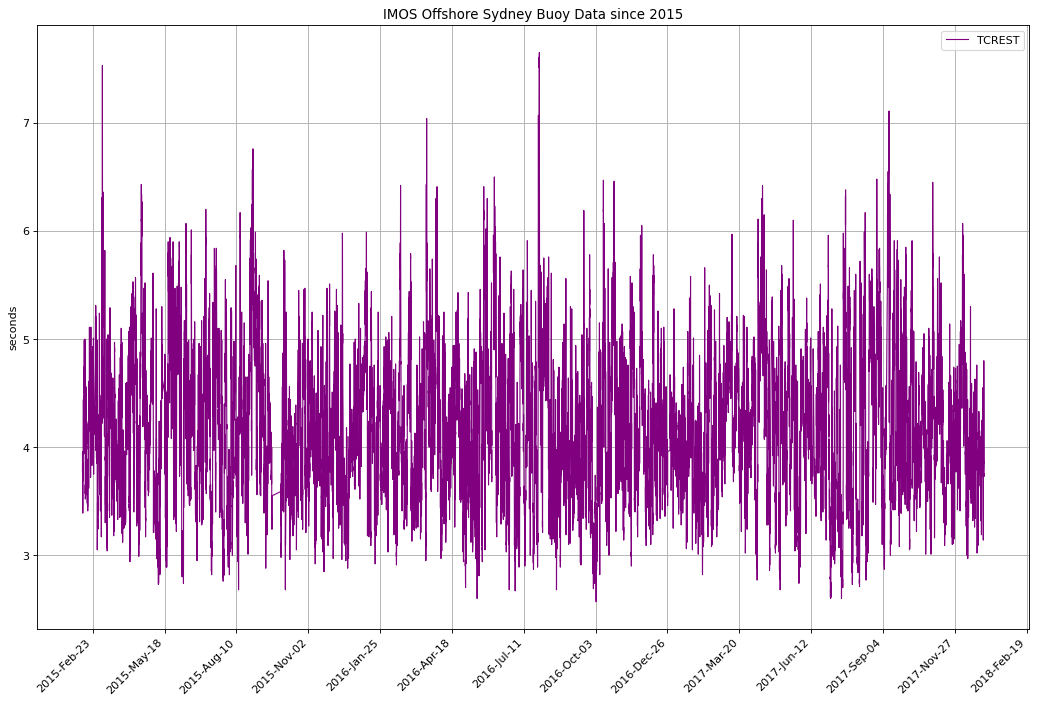

In [26]:
MyDateFormatter = DateFormatter('%Y-%b-%d')
fig = plt.figure(figsize=(16,10), dpi=80) 
ax1 = fig.add_subplot(111)

ax1.plot(datatime[itime:itime2],period[itime:itime2],linewidth=1,color='purple') 
ax1.xaxis.set_major_locator(WeekdayLocator(byweekday=MO,interval=12))
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('IMOS Offshore Sydney Buoy Data since 2015')
ax1.set_ylabel('seconds')
names = ['TCREST']
ax1.legend(names,loc='upper right')

# April 2015 storm

![alt text](https://i.guim.co.uk/img/media/643dfa81d4bbca129906d8a26c683e3e6901c053/0_110_3000_1801/3000.jpg?w=1010&q=55&auto=format&usm=12&fit=max&s=6dac931858af8c21404a5604900ae71d)

_A man fools around in the wind at Bondi Beach, Sydney, on April 21 2015._

To find the temporal `id` of the storm we use the python function `argmax`:

In [41]:
idmax = height[itime:itime2].argmax()
print('Temporal ID of the strom:',idmax)
print('Corresponding date:',datatime[idmax])

Temporal ID of the strom: 1595
Corresponding date: 2015-04-21 06:00:00


In [42]:
height[idmax]

5.582

(5.582, real_datetime(2015, 4, 21, 6, 0))

In [43]:
height[idmax-48:idmax+48]

masked_array(data=[0.693, 0.912, 1.202, 1.324, 1.365, 1.718, 1.843, 2.201,
                   2.359, 2.34 , 2.406, 2.45 , 2.44 , 2.194, 2.107, 2.169,
                   2.126, 2.313, 2.378, 2.387, 2.496, 2.485, 2.411, 2.31 ,
                   2.509, 2.838, 2.841, 3.198, 3.364, 3.538, 4.07 , 4.157,
                   4.573, 4.349, 4.689, 4.326, 4.566, 4.769, 5.197, 5.299,
                   5.159, 4.952, 4.445, 4.899, 5.333, 5.116, 5.359, 5.292,
                   5.582, 5.39 , 5.457, 5.19 , 4.839, 4.596, 4.52 , 4.768,
                   4.21 , 4.05 , 3.565, 3.72 , 3.617, 3.308, 3.13 , 3.029,
                   2.69 , 2.783, 2.721, 2.768, 2.993, 2.788, 2.627, 2.705,
                   2.63 , 2.335, 2.256, 2.066, 1.891, 1.801, 1.783, 1.763,
                   1.674, 1.566, 1.698, 1.72 , 1.822, 1.741, 1.6  , 1.705,
                   1.431, 1.436, 1.616, 1.511, 1.559, 1.32 , 1.377, 1.296],
             mask=False,
       fill_value=1e+20,
            dtype=float32)

## Plotting variables 

Set the wave height RMS 48h before and after the recorded maximum wave height RMS time.

In [44]:
storm_time = datatime[idmax-48:idmax+48]
storm_hrms = height[idmax-48:idmax+48]
storm_period = period[idmax-48:idmax+48]

In [46]:
#storm_period

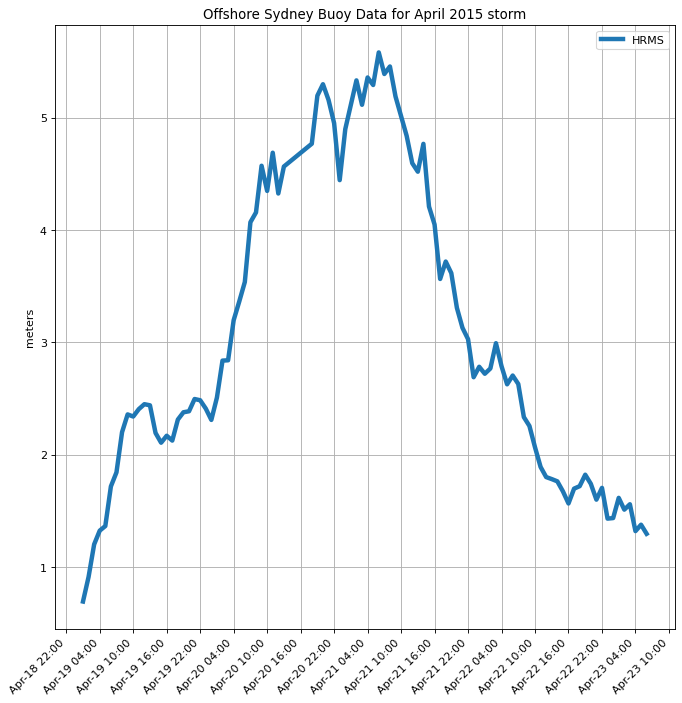

In [47]:
MyDateFormatter = DateFormatter('%b-%d %H:%M')
fig = plt.figure(figsize=(10,10), dpi=80) 
ax1 = fig.add_subplot(111)

ax1.plot(storm_time,storm_hrms,linewidth=4) 
ax1.xaxis.set_major_locator(HourLocator(byhour=range(24),interval=6))
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Offshore Sydney Buoy Data for April 2015 storm')
ax1.set_ylabel('meters')
names = ['HRMS']
ax1.legend(names,loc='upper right')

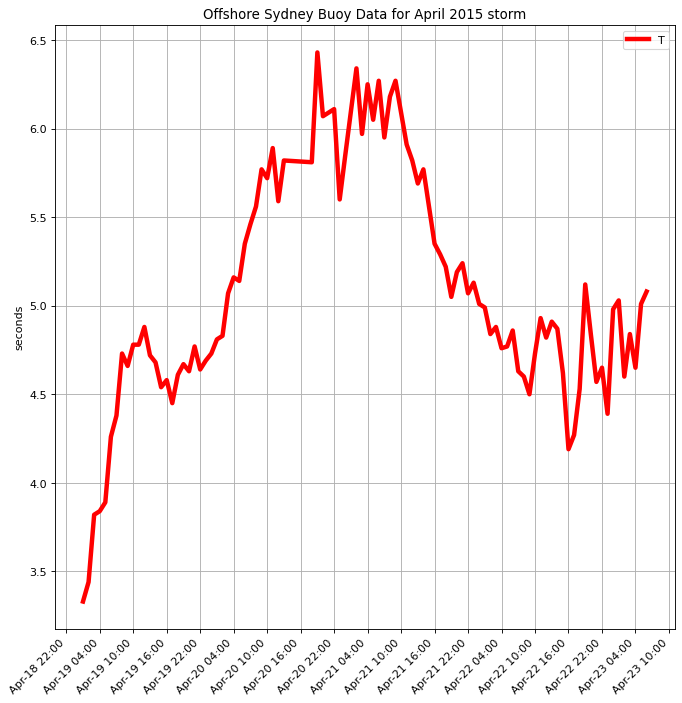

In [48]:
MyDateFormatter = DateFormatter('%b-%d %H:%M')
fig = plt.figure(figsize=(10,10), dpi=80) 
ax1 = fig.add_subplot(111)

ax1.plot(storm_time,storm_period,linewidth=4,color='red') 
ax1.xaxis.set_major_locator(HourLocator(byhour=range(24),interval=6))
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Offshore Sydney Buoy Data for April 2015 storm')
ax1.set_ylabel('seconds')
names = ['T']
ax1.legend(names,loc='upper right')

## Wave power and energy

- Wave power:
$$P = \frac{\rho g^2}{64 \pi} H_{mo}^2 T \simeq 0.5 H_{mo}^2 T$$

- Wave energy:
$$E = \frac{1}{16}\rho g H_{mo}^2$$

_Note:_
You can define $\pi$ using np.pi.

### Define the functions

In [49]:
height.mean()

1.1498777

In [50]:
height.max()

5.582

In [52]:
def wave_power(rho,g,h,period):
    power = rho * g**2 * h**2 * period / (64.*3.14)
    return power

def wave_energy(rho,g,h):
    energy =rho*g*h**2/16
    return energy

In [53]:
rho = 1000.0
g = 9.81

storm_power = wave_power(rho, g, storm_hrms, storm_period)
storm_energy = wave_energy(rho, g, storm_hrms)

In [56]:
#storm_energy

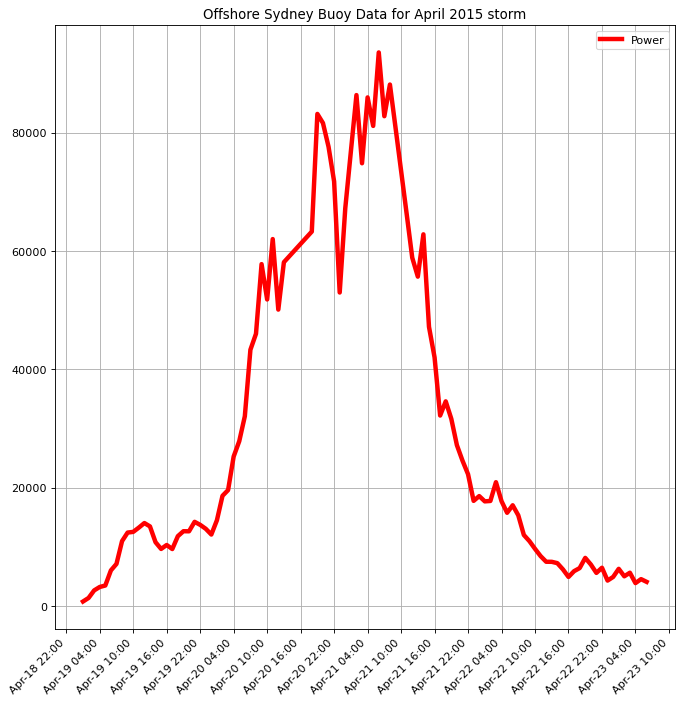

In [57]:
MyDateFormatter = DateFormatter('%b-%d %H:%M')
fig = plt.figure(figsize=(10,10), dpi=80) 
ax1 = fig.add_subplot(111)

ax1.plot(storm_time,storm_power,linewidth=4,color='red') 
ax1.xaxis.set_major_locator(HourLocator(byhour=range(24),interval=6))
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Offshore Sydney Buoy Data for April 2015 storm')
# ax1.set_ylabel('seconds')
names = ['Power']
ax1.legend(names,loc='upper right')

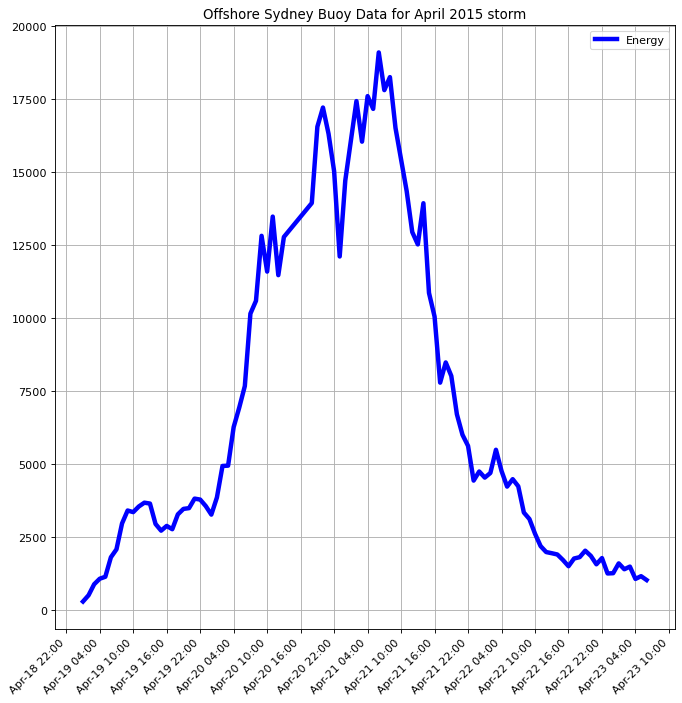

In [58]:
MyDateFormatter = DateFormatter('%b-%d %H:%M')
fig = plt.figure(figsize=(10,10), dpi=80) 
ax1 = fig.add_subplot(111)

ax1.plot(storm_time,storm_energy,linewidth=4,color='blue') 
ax1.xaxis.set_major_locator(HourLocator(byhour=range(24),interval=6))
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Offshore Sydney Buoy Data for April 2015 storm')
# ax1.set_ylabel('seconds')
names = ['Energy']
ax1.legend(names,loc='upper right')